## Analyze coverage_matrix. Either create coverage_matrix from scratch or load from csv

In [32]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from python_library import DMD_utilities as DMD_util
from python_library import coverage_matrix as cm
import pandas as pd

#### Create coverage_matrix_df

In [33]:
reload(DMD_util)
reload(cm)
DMD_exons_merged, exon_labels = DMD_util.get_DMD_exons_merged()
subj_name_filter = ['FRMR-00AW-8645', 'FRMR-00DM-853C']
bam_dir = '../../library_files/inputs/bam_files'
matrix_instance = cm.coverageMatrix()
cm_df = matrix_instance.create_coverage_matrix(DMD_exons_merged, exon_labels, bam_dir=bam_dir, subj_name_filter=subj_name_filter)

The following exons were merged: ['65|66']


Finished parsing all 2 subjects
42215 reads were skipped due to outside_of_exon
773 reads were skipped due to MAPQ below 60


#### Alternatively, load the coverage_matrix from csv

In [23]:
cm_df = pd.read_csv("../exon_data/coverage_matrix.csv", index_col=0)

#### Add a column with the ratio of inherited disease only reads compared to Trusight One only reads

In [62]:
cm_df['TSID_ratio'] = cm_df['TSID_only'] / (cm_df['TSID_only'] + cm_df['TSO_only'])

In [77]:
cm_df.filter(regex=('sequencer|TSID_ratio')).groupby('sequencer').describe()

TSID_ratio
sequencer                  
M1        count  729.000000
          mean     0.305275
          std      0.124933
          min      0.089742
          25%      0.103182
          50%      0.371627
          75%      0.382501
          max      0.434587
P1        count  364.000000
          mean     0.974551
          std      0.146013
          min      0.001384
          25%      0.994286
          50%      0.996764
          75%      0.998263
          max      1.000000
P2        count   23.000000
          mean     0.997482
          std      0.000837
          min      0.995844
          25%      0.996888
          50%      0.997560
          75%      0.998152
          max      0.998600
P3        count   18.000000
          mean     0.998485
          std      0.000525
          min      0.997444
          25%      0.998203
          50%      0.998566
...                     ...
T1        std      0.000399
          min      0.000537
          25%      0.000972
          50%      0.001387
          75%      0.001654
          max      0.002207
T2        count    8.000000
          mean     0.000591
          std      0.000083
          min      0.000458
          25%      0.000550
          50%      0.000596
          75%      0.000620
          max      0.000742
T3        count    8.000000
          mean     0.000626
          std      0.000071
          min      0.000512
          25%      0.000597
          50%      0.000631
          75%      0.000673
          max      0.000727
T4        count    8.000000
          mean     0.000531
          std      0.000094
          min      0.000415
          25%      0.000459
          50%      0.000547
          75%      0.000578
          max      0.000694

[64 rows x 1 columns]

#### Plot the distribution of TSID ratios across mixin panels

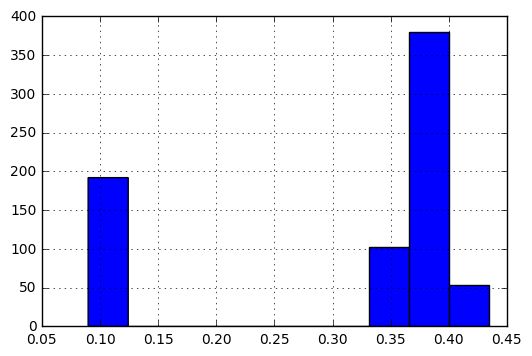

In [83]:
cm_df[cm_df['sequencer'] == 'M1']['TSID_ratio'].hist()

#### Look at which subjects appear to have been falsely labeled as inherited disease when the data indicates that they were really run on TruSight One

In [71]:
cm_df[(cm_df['sequencer'] == 'P1') & (cm_df['TSID_ratio'] < 0.9)].filter(regex=('subject|sequencer|TSID_ratio'))

,subject,sequencer,TSID_ratio
21,FPWB-0000-429L,P1,0.001606
462,FPWB-0000-865H,P1,0.002161
512,FPWB-0001-075V,P1,0.002322
731,FPWB-0000-780R,P1,0.002393
747,FPWB-0001-098N,P1,0.001663
754,FPWB-0001-1042,P1,0.001384
779,FPWB-0001-069O,P1,0.002183
995,FPWB-0001-0820,P1,0.001973


#### Add columns for summed coverage across all exons

In [79]:
cm_df['all_exons'] = cm_df.filter(regex=('Ex')).sum(axis=1)

#### Print summary stats for each exon across all female subjects

In [80]:
females_only = cm_df[cm_df['gender'] == 'F']
females_only.filter(regex=('Ex|all_exons')).describe().T

,count,mean,std,min,25%,50%,75%,max
Ex1,543.0,443.753223,336.405327,30.0,180.0,416.0,583.5,2647.0
Ex2,543.0,55.128913,34.380307,8.0,32.0,48.0,68.0,283.0
Ex3,543.0,135.808471,84.151661,30.0,85.5,121.0,162.0,760.0
Ex4,543.0,206.644567,142.729872,45.0,114.5,185.0,253.5,1183.0
Ex5,543.0,114.607735,68.174530,27.0,75.0,106.0,136.0,566.0
Ex6,543.0,167.314917,110.994607,32.0,98.0,149.0,203.5,890.0
Ex7,543.0,218.784530,172.613660,10.0,78.0,210.0,292.5,1153.0
Ex8,543.0,183.093923,129.112227,11.0,77.0,181.0,242.0,887.0
Ex9,543.0,73.712707,43.928304,5.0,44.0,67.0,97.0,339.0
Ex10,543.0,152.042357,109.605162,14.0,74.0,141.0,196.5,833.0
